In [3]:
import pandas as pd 
import numpy as np 

from sklearn import preprocessing
from sklearn import metrics

from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.ensemble import BalancedBaggingClassifier

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df= pd.read_csv("Training_Dataset.csv")

In [3]:
df.head()

,cm_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51
0,1,Charge,0,106920,4,18,970,0.7969,0.1831,337236,...,0,0,0,0,0,0,1,0,0,0
1,2,Charge,2,0,4,19,1030,0.0678,0.0000,2918974,...,0,0,0,0,1,0,0,0,0,0
2,3,Charge,2,399168,4,35,327,0.7551,0.2986,498656,...,0,0,0,0,0,0,1,0,0,0
3,4,Charge,0,267300,4,274,1258,0.7969,0.5297,2480074,...,0,1,0,0,0,0,1,0,0,1
4,5,Charge,0,213840,6,1,0,2.3238,0.0000,2918974,...,0,0,0,0,1,0,0,1,0,0


In [4]:
df.ix[:,:20].describe()

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,cm_key,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04
mean,20000.50000,1.117150,45507.619525,3.224150,89.264475,906.684950,0.726782,0.167726,1.998524e+06,0.329925,3.384588,11.993125,1.046025,0.329175,1.485472e+03,1.388516e+03,8.541835e+02,9.433976e+02
std,11547.14972,1.656335,86013.548027,2.324337,92.247710,921.135812,1.262927,0.206095,3.838523e+06,0.470191,1.890469,3.274286,0.422328,0.772550,2.509461e+04,9.448546e+04,1.346391e+04,1.515594e+04
min,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000100,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,10000.75000,0.000000,0.000000,2.000000,16.000000,327.000000,0.106000,0.000000,1.267680e+05,0.000000,1.753100,10.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,20000.50000,0.000000,0.000000,3.000000,53.000000,586.000000,0.382000,0.115500,7.368390e+05,0.000000,3.220350,12.000000,1.000000,0.000000,5.708000e+01,2.261500e+01,1.780000e+01,1.332000e+01
75%,30000.25000,2.000000,57736.000000,4.000000,134.000000,1197.000000,0.796900,0.268200,2.918974e+06,1.000000,5.011550,14.000000,1.000000,0.000000,4.011750e+02,2.123700e+02,1.960200e+02,1.801650e+02
max,40000.00000,11.000000,434629.000000,12.000000,355.000000,4830.000000,10.000000,0.883100,3.420702e+07,1.000000,7.001000,23.000000,9.000000,5.000000,3.722901e+06,1.862996e+07,1.845235e+06,1.974546e+06


In [5]:
df.ix[:,20:40].describe()

,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,mvar34,mvar35,mvar36,mvar37,mvar38,mvar39
count,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04,4.000000e+04
mean,2.886965e+03,1.754567e+03,1.895592e+03,1.646280e+03,1.158787e+03,1142.080482,1113.819778,1187.048064,406.459045,395.791140,377.963365,392.257667,3.373803e+04,3.638920e+04,3.211148e+04,3.106935e+04,7.921775e+04,4.840110e+04,4.590302e+04,4.625620e+04
std,2.566659e+04,1.543692e+04,2.316176e+04,1.635910e+04,1.105519e+04,9740.096504,9829.297144,10342.186952,2485.528218,2580.799331,2629.362739,2960.379369,2.957924e+05,7.292901e+05,4.881734e+05,5.104114e+05,4.497999e+05,3.085971e+05,2.605690e+05,5.075667e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.764531e+04,-1.175896e+04,-9.355530e+03,-1.018504e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.370382e+03,4.945130e+03,4.336993e+03,3.746507e+03
50%,1.216800e+02,0.000000e+00,0.000000e+00,0.000000e+00,6.945500e+01,68.765000,67.640000,69.105000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.547502e+04,1.473491e+04,1.360194e+04,1.261098e+04
75%,1.240168e+03,6.695200e+02,6.358150e+02,6.096175e+02,4.065750e+02,392.330000,398.950000,400.195000,132.470000,121.215000,95.640000,76.632500,1.567501e+04,1.468443e+04,1.332700e+04,1.239353e+04,6.855096e+04,4.018806e+04,3.869497e+04,3.668335e+04
max,2.311850e+06,1.493318e+06,2.357492e+06,1.451135e+06,1.236260e+06,858207.920000,943117.580000,680432.140000,178685.370000,198075.720000,203538.490000,289805.670000,4.884870e+07,9.996247e+07,8.725604e+07,9.261137e+07,5.410426e+07,3.339069e+07,3.574791e+07,8.716895e+07


In [6]:
Family_size= df["mvar2"].unique()
Family_size

array([ 0,  2,  5,  1,  4,  3,  6,  8,  9, 10, 11,  7])

In [7]:
Total_cards= df["mvar4"].unique()
Total_cards

array([ 4,  6,  1,  3,  0,  5,  2,  8,  7, 12,  9, 10, 11])

In [8]:
#Data not available for income
df["cm_key"][df.mvar9==0].count()

1605

In [9]:
#Data not available for Cosutumer Spending capacity
df["cm_key"][df.mvar3==0].count()

24354

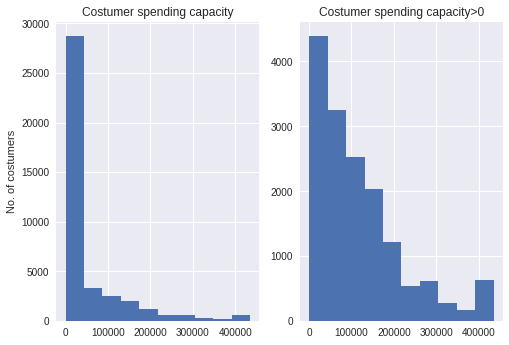

In [10]:
fig, (ax0,ax1) = plt.subplots(1,2,sharex=True)
ax0.hist(df.mvar3)
ax0.set(title='Costumer spending capacity', ylabel='No. of costumers')
ax1.set(title='Costumer spending capacity>0')
ax1.hist(df["mvar3"][df.mvar3>0])
plt.show()

In [11]:
df.ix[:,46:][df.mvar3>0].sum()/df["cm_key"][df.mvar3>0].count()

mvar46    0.423623
mvar47    0.296625
mvar48    0.279752
mvar49    0.081618
mvar50    0.068963
mvar51    0.080148
dtype: float64

In [12]:
df.ix[:,46:][df.mvar3==0].sum()/df["cm_key"][df.mvar3==0].count()

mvar46    0.427240
mvar47    0.288043
mvar48    0.284717
mvar49    0.089102
mvar50    0.064671
mvar51    0.062536
dtype: float64

In [13]:
df.ix[:,46:][df.mvar3>df.mvar3.mean()].sum()/df["cm_key"][df.mvar3>df.mvar3.mean()].count()

mvar46    0.395309
mvar47    0.297700
mvar48    0.306991
mvar49    0.080198
mvar50    0.066125
mvar51    0.083356
dtype: float64

In [14]:
df["mvar12"].unique()

array(['Office supplies    ', 'Unknown            ', 'Misc services      ',
       'Social services    ', 'Manufacturing      ', 'Entertainment      ',
       'Construction       ', 'Apparel', 'Finance            ',
       'Automotive         ', 'Personal services  ', 'Consumables        ',
       'Household          ', 'Transport          ', 'Non durable goods  ',
       'Durable goods      ', 'Produce            ', 'Mining             '], dtype=object)

In [15]:
Industries = pd.crosstab(df.mvar12, [df.mvar49, df.mvar50, df.mvar51])
Industries

mvar49                  0              1
mvar50                  0         1    0
mvar51                  0    1    0    0
mvar12                                  
Apparel               326   19   18   17
Automotive            404   34   37   45
Construction         2391  221  245  347
Consumables           929   96  100   87
Durable goods        1351   87  102  149
Entertainment        1816  172  164  225
Finance              2255  214  180  236
Household            1885  150  164  174
Manufacturing        1430   78  113  187
Mining                 42    2    0   10
Misc services        4253  410  322  455
Non durable goods     803   46   70   88
Office supplies      1698  143  159  197
Personal services    2202  244  217  258
Produce               510   45   56   64
Social services      3308  289  284  353
Transport            1198  122   85  139
Unknown              4321  405  338  416

In [274]:
df.mvar13.unique()

array([12, 11,  6, 13, 10, 15, 14, 16,  7, 18, 17,  8,  9,  5, 22,  0,  4,
       19,  2,  3, 20, 21, 23])

In [16]:
df2= pd.DataFrame(
  {
    "mvar13" : df.mvar13,
    "mvar49" :df.mvar49,
    "mvar50":df.mvar50,
    "mvar51":df.mvar51
})

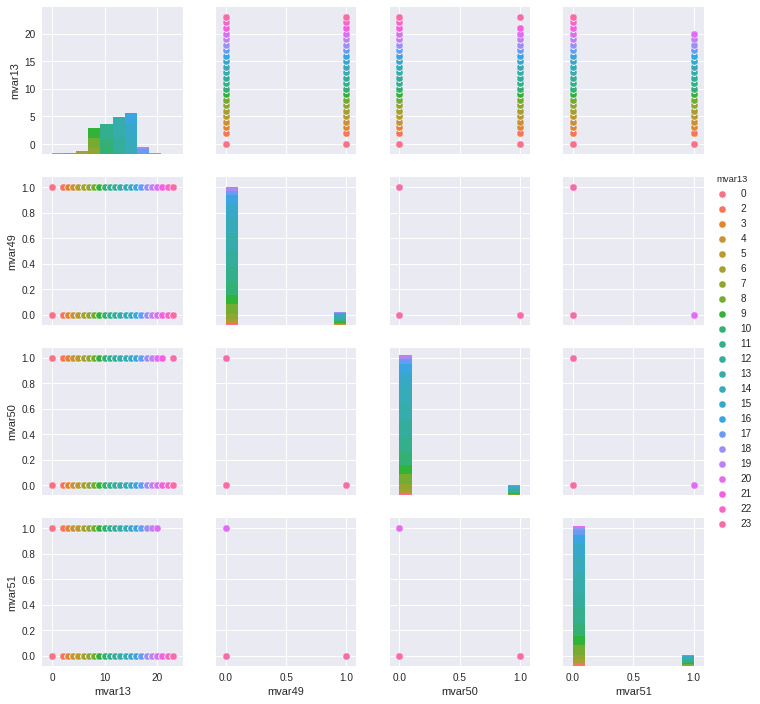

In [18]:
sns.pairplot(df2, hue="mvar13")
plt.show()

In [17]:
spend = df.mvar36 + df.mvar37 + df.mvar38 + df.mvar39
electronics = df.mvar16 + df.mvar17 + df.mvar18 + df.mvar19
car = df.mvar28 + df.mvar29 + df.mvar30 + df.mvar31

In [18]:
income = df["mvar9"][df.mvar9>0]


In [19]:
income= income.sort_values(ascending=True).reset_index()

In [20]:
median_income= income.median()[1]

In [21]:
mean_income = income.mean()[1]

In [22]:
df.mvar9.replace(to_replace=0, value=mean_income, inplace=True)

In [23]:
df2=df
df2.head()

,cm_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51
0,1,Charge,0,106920,4,18,970,0.7969,0.1831,337236.0,...,0,0,0,0,0,0,1,0,0,0
1,2,Charge,2,0,4,19,1030,0.0678,0.0000,2918974.0,...,0,0,0,0,1,0,0,0,0,0
2,3,Charge,2,399168,4,35,327,0.7551,0.2986,498656.0,...,0,0,0,0,0,0,1,0,0,0
3,4,Charge,0,267300,4,274,1258,0.7969,0.5297,2480074.0,...,0,1,0,0,0,0,1,0,0,1
4,5,Charge,0,213840,6,1,0,2.3238,0.0000,2918974.0,...,0,0,0,0,1,0,0,1,0,0


In [24]:
df2.drop(["cm_key", "mvar1", "mvar3"], axis=1, inplace=True)

In [25]:
df2a= df2.ix[:, 0:14]

In [26]:
df2b= df2.iloc[:,40:43]
df2b

,mvar43,mvar44,mvar45
0,0,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,1,0,0
8,0,0,0
9,0,0,0


In [27]:
df2= pd.concat([df2a, df2b], axis=1)
df2.head()

,mvar2,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar43,mvar44,mvar45
0,0,4,18,970,0.7969,0.1831,337236.0,1,6.0899,Office supplies,12,1,0,0.00,0,0,0
1,2,4,19,1030,0.0678,0.0000,2918974.0,1,4.2016,Unknown,11,1,0,52.45,0,0,0
2,2,4,35,327,0.7551,0.2986,498656.0,0,3.3760,Misc services,12,1,1,1079.04,0,0,0
3,0,4,274,1258,0.7969,0.5297,2480074.0,1,4.1082,Social services,12,1,0,534.69,1,0,0
4,0,6,1,0,2.3238,0.0000,2918974.0,0,0.0000,Unknown,6,2,0,0.00,0,0,0


In [28]:
df2["spend"]=spend

In [29]:
df2["supplementary_offered"]= df.mvar46

In [30]:
df2["supplementary"]= df.mvar49

In [31]:
df2.mvar9 = np.log(df2.mvar9)

In [32]:
df2.spend= (df2.spend- df2.spend.mean())/df2.spend.std()

In [33]:
#df2.mvar6 = (df2.mvar6- df2.mvar6.mean())/df2.mvar6.std()

In [34]:
le= preprocessing.LabelEncoder()
df2.mvar12= le.fit_transform(df2.mvar12)

In [35]:
df2.describe()

,mvar2,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar43,mvar44,mvar45,spend,supplementary_offered,supplementary
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000
mean,1.117150,3.224150,89.264475,906.684950,0.726782,0.167726,13.500402,0.329925,3.384588,9.967850,11.993125,1.046025,0.329175,1.485472e+03,0.083075,0.025475,0.004925,-1.999845e-16,0.425825,0.086175
std,1.656335,2.324337,92.247710,921.135812,1.262927,0.206095,1.633287,0.470191,1.890469,5.040878,3.274286,0.422328,0.772550,2.509461e+04,0.320275,0.218237,0.070006,1.000000e+00,0.494474,0.280626
min,0.000000,0.000000,1.000000,0.000000,0.000100,0.000000,4.094345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.669018e-01,0.000000,0.000000
25%,0.000000,2.000000,16.000000,327.000000,0.106000,0.000000,11.959003,0.000000,1.753100,6.000000,10.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.462045e-01,0.000000,0.000000
50%,0.000000,3.000000,53.000000,586.000000,0.382000,0.115500,13.977593,0.000000,3.220350,10.000000,12.000000,1.000000,0.000000,5.708000e+01,0.000000,0.000000,0.000000,-1.125815e-01,0.000000,0.000000
75%,2.000000,4.000000,134.000000,1197.000000,0.796900,0.268200,14.886743,1.000000,5.011550,15.000000,14.000000,1.000000,0.000000,4.011750e+02,0.000000,0.000000,0.000000,-2.442707e-02,1.000000,0.000000
max,11.000000,12.000000,355.000000,4830.000000,10.000000,0.883100,17.347941,1.000000,7.001000,17.000000,23.000000,9.000000,5.000000,3.722901e+06,5.000000,4.000000,1.000000,1.101513e+02,1.000000,1.000000


In [36]:
df2= df2[df2.supplementary_offered==1]
df2.supplementary.sum()

3447L

In [37]:
df2_majority = df2[df2.supplementary==0]
df2_minority = df2[df2.supplementary==1]
print "majority : " + str(df2_majority.shape)
print "minority : " + str(df2_minority.shape)

majority : (13586, 20)
minority : (3447, 20)


In [38]:
df2_majority_downsampled = resample(df2_majority, 
                                 replace=False,    
                                 n_samples=8000,     
                                 random_state=123)

In [39]:
df2_minority_upsampled = resample(df2_minority, 
                                 replace=True,    
                                 n_samples=6000,     
                                 random_state=123)

In [40]:
df3= pd.concat([df2_majority_downsampled, df2_minority_upsampled])
df3.shape

(14000, 20)

In [41]:
train, test= train_test_split(df3, test_size=0.3)

In [42]:
x_train = train.ix[:, :-1]
y_train= train.ix[:, -1]
x_test = test.ix[:, :-1]
y_test= test.ix[:, -1]

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.
/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [302]:
LR = LogisticRegression()
LR = LR.fit(x_train, y_train)

In [303]:
y_predicted= LR.predict(x_test)

In [304]:
y_predicted.sum()

1058

In [305]:
print(metrics.accuracy_score(y_test, y_predicted))
print(metrics.confusion_matrix(y_test, y_predicted))
print(metrics.classification_report(y_test, y_predicted))

0.628571428571
[[2012  430]
 [1130  628]]
             precision    recall  f1-score   support

          0       0.64      0.82      0.72      2442
          1       0.59      0.36      0.45      1758

avg / total       0.62      0.63      0.61      4200



In [306]:
DTC= DecisionTreeClassifier(max_depth=200, class_weight= {0:0.2,1:0.8})

In [307]:
DTC.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='gini',
            max_depth=200, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [308]:
y_predicted= DTC.predict(x_test)

In [309]:
print(metrics.accuracy_score(y_test, y_predicted))
print(metrics.confusion_matrix(y_test, y_predicted))
print(metrics.classification_report(y_test, y_predicted))

0.768333333333
[[1796  646]
 [ 327 1431]]
             precision    recall  f1-score   support

          0       0.85      0.74      0.79      2442
          1       0.69      0.81      0.75      1758

avg / total       0.78      0.77      0.77      4200



In [43]:
df4 = df
df4.head()

,mvar2,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,...,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48,mvar49,mvar50,mvar51
0,0,4,18,970,0.7969,0.1831,337236.0,1,6.0899,Office supplies,...,0,0,0,0,0,0,1,0,0,0
1,2,4,19,1030,0.0678,0.0000,2918974.0,1,4.2016,Unknown,...,0,0,0,0,1,0,0,0,0,0
2,2,4,35,327,0.7551,0.2986,498656.0,0,3.3760,Misc services,...,0,0,0,0,0,0,1,0,0,0
3,0,4,274,1258,0.7969,0.5297,2480074.0,1,4.1082,Social services,...,0,1,0,0,0,0,1,0,0,1
4,0,6,1,0,2.3238,0.0000,2918974.0,0,0.0000,Unknown,...,0,0,0,0,1,0,0,1,0,0


In [44]:
df4a= df4.ix[:, 0:13]
df4a.head()

,mvar2,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15
0,0,4,18,970,0.7969,0.1831,337236.0,1,6.0899,Office supplies,12,1,0
1,2,4,19,1030,0.0678,0.0000,2918974.0,1,4.2016,Unknown,11,1,0
2,2,4,35,327,0.7551,0.2986,498656.0,0,3.3760,Misc services,12,1,1
3,0,4,274,1258,0.7969,0.5297,2480074.0,1,4.1082,Social services,12,1,0
4,0,6,1,0,2.3238,0.0000,2918974.0,0,0.0000,Unknown,6,2,0


In [45]:
df4b= df4.ix[:, 37:43]
df4b

,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,1,0,0,1,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,1,0,0,1,0,0
8,1,0,0,0,0,0
9,0,0,0,0,0,0


In [46]:
df4= pd.concat([df4a, df4b], axis=1)

In [47]:
df4["spend"]=spend
# df4["electronics"] = electronics
# df4["car"] = car

In [48]:
# taking log
# df4.mvar9 = np.log(df4.mvar9)

# normalizing
std_scale = preprocessing.StandardScaler().fit(df4.mvar9)
df4.mvar9 = std_scale.transform(df4.mvar9)

ValueError: Expected 2D array, got 1D array instead:
array=[  337236.  2918974.   498656. ...,   701977.  2918974.  2918974.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [316]:
std_scale = preprocessing.StandardScaler().fit(df4.spend)
df4.spend = std_scale.transform(df4.spend)

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [317]:
# std_scale = preprocessing.StandardScaler().fit(df4.electronics)
# df4.electroics = std_scale.transform(df4.electronics)

In [318]:
# std_scale = preprocessing.StandardScaler().fit(df4.car)
# df4.car = std_scale.transform(df4.car)

In [319]:
std_scale = preprocessing.StandardScaler().fit(df4.mvar6)
df4.mvar6 = std_scale.transform(df4.mvar6)

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [320]:
df4.describe()

,mvar2,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar13,mvar14,mvar15,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,spend
count,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04
mean,1.117150,3.224150,89.264475,5.253575e-17,0.726782,0.167726,3.343645e-16,0.329925,3.384588,11.993125,1.046025,0.329175,0.293025,0.072300,0.070925,0.083075,0.025475,0.004925,-3.393119e-18
std,1.656335,2.324337,92.247710,1.000013e+00,1.262927,0.206095,1.000013e+00,0.470191,1.890469,3.274286,0.422328,0.772550,0.608663,0.315872,0.267014,0.320275,0.218237,0.070006,1.000013e+00
min,0.000000,0.000000,1.000000,-9.843242e-01,0.000100,0.000000,-5.455043e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.669039e-01
25%,0.000000,2.000000,16.000000,-6.293233e-01,0.106000,0.000000,-5.045898e-01,0.000000,1.753100,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.462064e-01
50%,0.000000,3.000000,53.000000,-3.481451e-01,0.382000,0.115500,-2.374087e-01,0.000000,3.220350,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.125829e-01
75%,2.000000,4.000000,134.000000,3.151747e-01,0.796900,0.268200,2.192771e-01,1.000000,5.011550,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.442737e-02
max,11.000000,12.000000,355.000000,4.259268e+00,10.000000,0.883100,8.417024e+00,1.000000,7.001000,23.000000,9.000000,5.000000,5.000000,4.000000,3.000000,5.000000,4.000000,1.000000,1.101527e+02


In [321]:
le2 = preprocessing.LabelEncoder()
df4.mvar12 = le2.fit_transform(df4.mvar12)

In [322]:
df4.describe()

,mvar2,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,spend
count,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04
mean,1.117150,3.224150,89.264475,5.253575e-17,0.726782,0.167726,3.343645e-16,0.329925,3.384588,9.967850,11.993125,1.046025,0.329175,0.293025,0.072300,0.070925,0.083075,0.025475,0.004925,-3.393119e-18
std,1.656335,2.324337,92.247710,1.000013e+00,1.262927,0.206095,1.000013e+00,0.470191,1.890469,5.040878,3.274286,0.422328,0.772550,0.608663,0.315872,0.267014,0.320275,0.218237,0.070006,1.000013e+00
min,0.000000,0.000000,1.000000,-9.843242e-01,0.000100,0.000000,-5.455043e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.669039e-01
25%,0.000000,2.000000,16.000000,-6.293233e-01,0.106000,0.000000,-5.045898e-01,0.000000,1.753100,6.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.462064e-01
50%,0.000000,3.000000,53.000000,-3.481451e-01,0.382000,0.115500,-2.374087e-01,0.000000,3.220350,10.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.125829e-01
75%,2.000000,4.000000,134.000000,3.151747e-01,0.796900,0.268200,2.192771e-01,1.000000,5.011550,15.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.442737e-02
max,11.000000,12.000000,355.000000,4.259268e+00,10.000000,0.883100,8.417024e+00,1.000000,7.001000,17.000000,23.000000,9.000000,5.000000,5.000000,4.000000,3.000000,5.000000,4.000000,1.000000,1.101527e+02


In [323]:
df.groupby(by=['mvar49', 'mvar50', 'mvar51']).mvar2.count()

mvar49  mvar50  mvar51
0       0       0         31122
                1          2777
        1       0          2654
1       0       0          3447
Name: mvar2, dtype: int64

In [324]:
df4["supplementary"] = df.mvar49
df4["elite"] = df.mvar50
df4["credit"] = df.mvar51

In [325]:
df4.elite = df4.elite*2
df4.credit = df4.credit*3

In [326]:
# 0:no card;  1:supplementary;  2:elite;  3:credit
df4["card_accepted"] = df4.supplementary + df4.credit + df4.elite

In [327]:
df4.drop(["supplementary", "elite", "credit"], axis=1, inplace=True)

In [328]:
df4.head()

,mvar2,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,...,mvar14,mvar15,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,spend,card_accepted
0,0,4,18,0.068737,0.7969,0.1831,-0.457161,1,6.0899,12,...,1,0,0,0,0,0,0,0,0.321125,0
1,2,4,19,0.133874,0.0678,0.0000,0.219277,1,4.2016,17,...,1,0,0,0,0,0,0,0,-0.133348,0
2,2,4,35,-0.629323,0.7551,0.2986,-0.414868,0,3.3760,10,...,1,1,0,0,0,0,0,0,-0.008518,0
3,0,4,274,0.381398,0.7969,0.5297,0.104281,1,4.1082,15,...,1,0,1,0,0,1,0,0,-0.072286,3
4,0,6,1,-0.984324,2.3238,0.0000,0.219277,0,0.0000,17,...,2,0,0,0,0,0,0,0,0.123923,1


In [381]:
train, test= train_test_split(df4, test_size=0.3)

In [382]:
x_train = train.ix[:, :-1]
y_train = train.ix[:, -1]
x_test = test.ix[:, :-1]
y_test = test.ix[:, -1]

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.
/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [383]:
sm = SMOTE(ratio=0.6, kind="svm", k_neighbors=10)

In [384]:
x_train, y_train = sm.fit_sample(x_train, y_train)

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


In [385]:
x_train, y_train = sm.fit_sample(x_train, y_train)

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


In [386]:
x_train, y_train = sm.fit_sample(x_train, y_train)

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


In [387]:
print np.bincount(y_train)

[21733 13038 13039 13039]


In [388]:
x_train.shape

(60849, 20)

In [330]:
df4_majority = df4[df4.card_accepted==0]
df4_supp = df4[df4.card_accepted==1]
df4_elite = df4[df4.card_accepted==2]
df4_credit = df4[df4.card_accepted==3]

In [331]:
df4_majority.shape

(31122, 21)

In [332]:
df4_majority_downsampled = resample(df4_majority,
                                    replace=False,
                                    n_samples=18000,
                                    random_state=123)

In [333]:
df4_supp_upsampled = resample(df4_supp,
                              replace=True,
                              n_samples=9000,
                              random_state=123)

In [334]:
df4_elite_upsampled = resample(df4_elite,
                               replace=True,
                               n_samples=9000,
                               random_state=123)

In [335]:
df4_credit_upsampled = resample(df4_credit,
                                replace=True,    
                                n_samples=9000,     
                                random_state=123)

In [336]:
df5 = pd.concat([df4_majority_downsampled, df4_supp_upsampled, df4_elite_upsampled, df4_credit_upsampled])
df5.shape

(45000, 21)

In [337]:
df6 = pd.concat([df4_majority, df4_supp_upsampled, df4_elite_upsampled, df4_credit_upsampled])
df6.shape

(58122, 21)

In [338]:
train, test= train_test_split(df5, test_size=0.3)

In [339]:
x_train = train.ix[:, :-1]
y_train = train.ix[:, -1]
x_test = test.ix[:, :-1]
y_test = test.ix[:, -1]

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.
/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [340]:
LR2 = LogisticRegression()
LR2 = LR2.fit(x_train, y_train)

In [341]:
y_predicted= LR2.predict(x_test)

In [342]:
print(metrics.accuracy_score(y_test, y_predicted))
print(metrics.confusion_matrix(y_test, y_predicted))
print(metrics.classification_report(y_test, y_predicted))

0.457703703704
[[3854  441  675  398]
 [1388  764  335  215]
 [1565   51 1075   29]
 [1726  126  372  486]]
             precision    recall  f1-score   support

          0       0.45      0.72      0.55      5368
          1       0.55      0.28      0.37      2702
          2       0.44      0.40      0.42      2720
          3       0.43      0.18      0.25      2710

avg / total       0.46      0.46      0.43     13500



In [343]:
DTC2 = DecisionTreeClassifier(max_depth=100, class_weight={0:0.4,1:0.2, 2:0.2, 3:0.2})

In [344]:
DTC2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.4, 1: 0.2, 2: 0.2, 3: 0.2},
            criterion='gini', max_depth=100, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [345]:
y_predicted = DTC2.predict(x_test)

In [346]:
print(metrics.accuracy_score(y_test, y_predicted))
print(metrics.confusion_matrix(y_test, y_predicted))
print(metrics.classification_report(y_test, y_predicted))

0.79237037037
[[3309  864  584  611]
 [ 255 2346   44   57]
 [ 125   33 2553    9]
 [ 149   33   39 2489]]
             precision    recall  f1-score   support

          0       0.86      0.62      0.72      5368
          1       0.72      0.87      0.78      2702
          2       0.79      0.94      0.86      2720
          3       0.79      0.92      0.85      2710

avg / total       0.80      0.79      0.79     13500



In [389]:
xgb = XGBClassifier(objective='multi:softmax', max_depth=100)

In [390]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=100, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='multi:softprob', seed=0,
       silent=True, subsample=1)

In [391]:
y_predicted = xgb.predict(x_test)

In [392]:
print(metrics.accuracy_score(y_test, y_predicted))
print(metrics.confusion_matrix(y_test, y_predicted))
print(metrics.classification_report(y_test, y_predicted))

0.6285
[[6886 1198  697  608]
 [ 623  303   59   65]
 [ 457   73  197   50]
 [ 519   53   56  156]]
             precision    recall  f1-score   support

          0       0.81      0.73      0.77      9389
          1       0.19      0.29      0.23      1050
          2       0.20      0.25      0.22       777
          3       0.18      0.20      0.19       784

avg / total       0.68      0.63      0.65     12000



In [421]:
test_df= pd.read_csv("Leaderboard_Dataset.csv")
test_df.head()

,cm_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45
0,50001,Charge,2,0,4,18,460,0.2495,0.2310,180512,...,32886.89,11345.47,7914.21,7704.62,0,0,0,0,0,0
1,50002,Charge,2,0,0,45,381,1.9329,0.7196,11295211,...,104722.52,255544.59,116216.40,152673.00,1,0,0,0,0,0
2,50003,Charge,0,0,4,3,0,0.7969,0.0000,45161,...,19689.03,0.00,0.00,0.00,0,0,0,0,0,0
3,50004,Charge,1,18711,9,89,432,0.1016,0.5074,420972,...,13154.43,7671.62,3357.24,2651.22,0,1,0,0,0,0
4,50005,Charge,0,21384,4,7,0,0.7969,0.2310,880618,...,32071.78,15376.01,14390.97,0.00,0,0,0,0,0,0


In [422]:
test_income = test_df["mvar9"][test_df.mvar9>0]
test_income= test_income.sort_values(ascending=True).reset_index()
median_income= test_income.median()[1]
mean_income = test_income.mean()[1]
test_df.mvar9.replace(to_replace=0, value=mean_income, inplace=True)
test_spend = test_df.mvar36 + test_df.mvar37 + test_df.mvar38 + test_df.mvar39
test_electronics = test_df.mvar16 + test_df.mvar17 + test_df.mvar18 + test_df.mvar19
test_car = test_df.mvar28 + test_df.mvar29 + test_df.mvar30 + test_df.mvar31

In [423]:
test_df.drop(["cm_key", "mvar1", "mvar3"], axis=1, inplace=True)

In [424]:
# test_df.drop(["mvar6"], axis=1, inplace=True)

In [425]:
test_df.head()

,mvar2,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,...,mvar36,mvar37,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45
0,2,4,18,460,0.2495,0.2310,180512.0,0,5.0612,Personal services,...,32886.89,11345.47,7914.21,7704.62,0,0,0,0,0,0
1,2,0,45,381,1.9329,0.7196,11295211.0,0,4.0930,Misc services,...,104722.52,255544.59,116216.40,152673.00,1,0,0,0,0,0
2,0,4,3,0,0.7969,0.0000,45161.0,0,2.3941,Misc services,...,19689.03,0.00,0.00,0.00,0,0,0,0,0,0
3,1,9,89,432,0.1016,0.5074,420972.0,0,1.5442,Consumables,...,13154.43,7671.62,3357.24,2651.22,0,1,0,0,0,0
4,0,4,7,0,0.7969,0.2310,880618.0,0,2.6261,Non durable goods,...,32071.78,15376.01,14390.97,0.00,0,0,0,0,0,0


In [426]:
test_dfa= test_df.ix[:,0:13]

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [427]:
test_dfb= test_df.ix[:, 37:43]

In [428]:
test_df= pd.concat([test_dfa, test_dfb], axis=1)

In [429]:
le = preprocessing.LabelEncoder()
test_df.mvar12 = le.fit_transform(test_df.mvar12)

In [430]:
test_df.head(2)

,mvar2,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45
0,2,4,18,460,0.2495,0.2310,180512.0,0,5.0612,13,12,1,0,0,0,0,0,0,0
1,2,0,45,381,1.9329,0.7196,11295211.0,0,4.0930,10,13,1,0,1,0,0,0,0,0


In [431]:
# test_df["mvar9"]= np.log(test_df["mvar9"])
std_scale = preprocessing.StandardScaler().fit(test_df.mvar9)
test_df.mvar9 = std_scale.transform(test_df.mvar9)

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [432]:
test_df["spend"]=test_spend
# test_df["electronics"]=electronics
# test_df["car"]=car

In [433]:
std_scale = preprocessing.StandardScaler().fit(test_df.spend)
test_df.spend = std_scale.transform(test_df.spend)

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [434]:
# std_scale = preprocessing.StandardScaler().fit(test_df.electronics)
# test_df.electronics = std_scale.transform(test_df.electronics)

In [435]:
# std_scale = preprocessing.StandardScaler().fit(test_df.car)
# test_df.car = std_scale.transform(test_df.car)

In [436]:
std_scale = preprocessing.StandardScaler().fit(test_df.mvar6)
test_df.mvar6 = std_scale.transform(test_df.mvar6)

/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/media/pindaari/Softwares/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [437]:
test_df.head()

,mvar2,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,spend
0,2,4,18,-0.487386,0.2495,0.2310,-0.491540,0,5.0612,13,12,1,0,0,0,0,0,0,0,-0.288141
1,2,0,45,-0.572347,1.9329,0.7196,2.396835,0,4.0930,10,13,1,0,1,0,0,0,0,0,0.788464
2,0,4,3,-0.982092,0.7969,0.0000,-0.526714,0,2.3941,10,10,1,0,0,0,0,0,0,0,-0.364091
3,1,9,89,-0.517499,0.1016,0.5074,-0.429052,0,1.5442,3,11,1,1,0,1,0,0,0,0,-0.350578
4,0,4,7,-0.982092,0.7969,0.2310,-0.309604,0,2.6261,11,14,6,0,0,0,0,0,0,0,-0.284382


In [438]:
test_result= xgb.predict(test_df)

In [439]:
test_result

array([0, 0, 0, ..., 3, 0, 0])

In [440]:
test_df2 = pd.read_csv("Leaderboard_Dataset.csv")

In [441]:
result= pd.DataFrame(
{
    "card_accepted": test_result,
    "cm_key": test_df2.cm_key
    
})

In [442]:
result.shape

(10000, 2)

In [443]:
result.card_accepted.replace(to_replace=0, value="No_card", inplace=True)

In [444]:
result.card_accepted.replace(to_replace=1, value="Supp", inplace=True)
result.card_accepted.replace(to_replace=2, value="Elite", inplace=True)
result.card_accepted.replace(to_replace=3, value="Credit", inplace=True)

In [445]:
submission= result[result.card_accepted != "No_card"]

In [446]:
submission.shape

(2538, 2)

In [447]:
submission= submission.reindex_axis(sorted(submission.columns, reverse=True), axis=1)

In [448]:
submission= submission[:1000]

In [449]:
# submission

In [450]:
submission.to_csv("Reckless_Serenade_IITRoorkee_15.csv", header=False, index=False)